# Feature Selection Workshop

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Q1 Use Pandas to read in ‘wine.csv’.
df = pd.read_csv('../Data_Sets/wine.csv')

In [3]:
#check top 5 columns
df.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#Q2 Create a correlation matrix using Pandas’ corr function.
corr_mat = df.corr() #performs pearson correlation

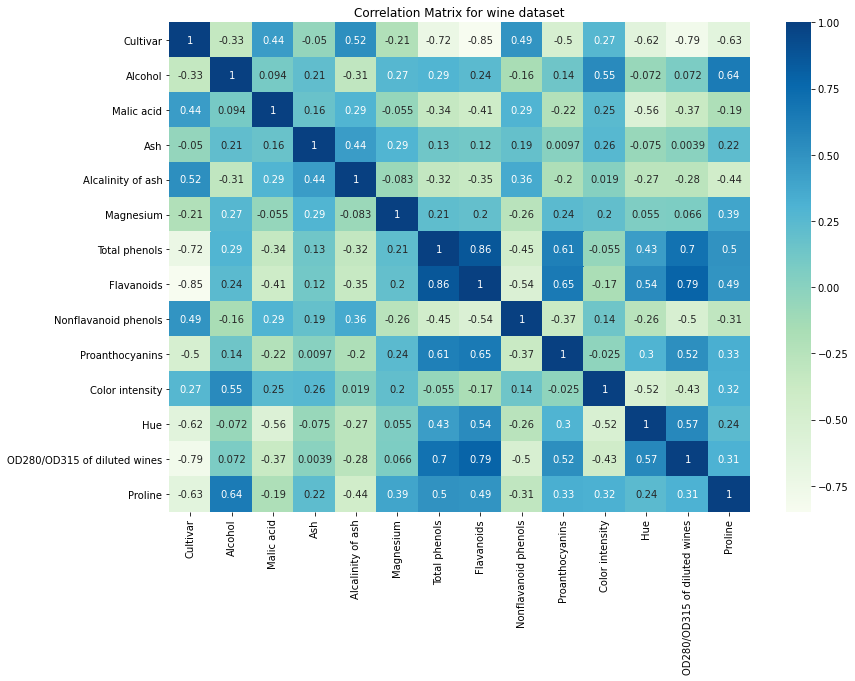

In [5]:
#Q3 Display the heatmap of the Pearson Correlation matrix. 
#Title the heatmap as ‘Correlation Matrix for wine dataset’.
plt.figure(figsize=(13,9))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.title('Correlation Matrix for wine dataset')
plt.show()

In [25]:
#Q4 Using corr_mat, compute the features that are either more than 0.5 (positively correlated) 
#and less than -0.5 (negatively correlated) correlated 
#to the column ‘Cultivar’ (our label/class in this dataset). 
#Print out the potential features and their correlation.
target = 'Cultivar'
candidates = corr_mat[(corr_mat[target] >= 0.5) | (corr_mat[target] <= -0.5)]
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)

print(candidates_df.drop(index=target)[target], '\n', sep=' ')

Alcalinity of ash               0.517859
Total phenols                  -0.719163
Flavanoids                     -0.847498
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Cultivar, dtype: float64 



In [26]:
#Q5 For each potential feature (above), check that it is in turn not highly correlated 
#with the rest of the potential features. 
#Consider two or more potential features as highly correlated if the Pearson correlation 
#coefficient between them is greater than 0.6 (positively correlated). 
#If two potential features are highly correlated, select only the one with a higher correlation 
#against our target ‘Cultivar’.

#Print out the potential features that are removed and the final selected features

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        #get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]
        
        #look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]
        
        #look for 'Cultivar' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]
        
        #idxmax() to get feature name that is most correlated with 'Cultivar'
        top_feature = similar_to_entry_s.abs().idxmax()
        
        #accept feature with max correlation against 'Cultivar'
        accept.append(top_feature)
        
        #discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Skipped Features = ', set(skip) - {target})
print('Selected Features = ', accept)

Skipped Features =  {'OD280/OD315 of diluted wines', 'Flavanoids'}
Selected Features =  ['Alcalinity of ash', 'Total phenols', 'Hue', 'Proline']
